# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



#TODO

-- Revisar escrita
-- Kaggle
-- Responder conclusoes
-- Devolver variável de necessidade especial 1
-- Responder parágrafos de conclues



In [1]:
# TODO: RA \& Name 
print('139373: ' + 'Cinthia Cristina Calchi Kleiner')
print('103897: ' + 'Randerson A. Lemos')

139373: Cinthia Cristina Calchi Kleiner
103897: Randerson A. Lemos


 ## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




In [2]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import SGDRegressor, LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = None

In [4]:
SEED = 42

### Exploratory Data Analysis:

In [5]:
data_path = "assets/SARESP_train.csv"
df=pd.read_csv(data_path)

In [6]:
print(df.shape)

(120596, 88)


In [7]:
###
# With a pandas dataframe, it is possible to check how many records we have in the 
# trainning data. Let's use the method DataFrame.info to get an overview of the 
# loaded dataset.
###

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120596 entries, 0 to 120595
Data columns (total 88 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CD_ALUNO             120596 non-null  int64  
 1   NOMESC               120596 non-null  object 
 2   Q1                   120596 non-null  object 
 3   Q2                   120596 non-null  object 
 4   Q3                   120596 non-null  object 
 5   Q4                   120596 non-null  object 
 6   Q5                   120596 non-null  object 
 7   Q6                   120596 non-null  object 
 8   Q7                   120596 non-null  object 
 9   Q8                   120596 non-null  object 
 10  Q9                   120596 non-null  object 
 11  Q10                  120596 non-null  object 
 12  Q11                  120596 non-null  object 
 13  Q12                  120596 non-null  object 
 14  Q13                  120596 non-null  object 
 15  Q14              

In [8]:
###
# Let's now visualize the percentage of the number of missing data in each 
# dataframe column. The following code show us the columns that have a null values 
# percentage greater than zero. The variables NEC_ESP_1, NEC_ESP_2 , NEC_ESP_2, NEC_ESP_4 
# and NEC_ESP_5 do not own 98% of their data
###

for col in df.columns:
    na_percentage = df[col].isna().sum() / df.shape[0] * 100
    if na_percentage > 0:
        print(f'Column Name: {col}, Null Values Percentage: {na_percentage}')

Column Name: NEC_ESP_1, Null Values Percentage: 98.01817639059338
Column Name: NEC_ESP_2, Null Values Percentage: 99.91127400577133
Column Name: NEC_ESP_3, Null Values Percentage: 99.93697966765068
Column Name: NEC_ESP_4, Null Values Percentage: 99.99917078510066
Column Name: NEC_ESP_5, Null Values Percentage: 100.0


In [9]:
###
# At a first glancy, it seens that the columns NEC_ESP_* are degenerated with the 
# marjority of the samples missing. But, since this columns are associated to
# students with some sort of special deasibility it is plausible to assume that
# the samples with no information are from students that do not carry those 
# conditions. Even thoungh this is the case, we decided to still drop those columns since
# the column Tem_Nec sintetizes the information of students with with and without those 
# special conditions.
###

# df = df.drop(['NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5'], axis=1)

In [10]:
###
# Dataset actual state
###

df.head(10)

,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,MUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,NEC_ESP_1,NEC_ESP_2,NEC_ESP_3,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,JULIO FORTES,B,E,E,E,E,E,E,E,B,A,A,A,A,A,A,B,A,B,B,B,B,A,A,A,A,A,C,C,B,B,B,C,A,B,C,C,C,C,C,C,C,A,C,C,C,C,C,C,C,B,C,B,B,B,B,A,D,C,C,D,C,A,D,Região Metropolitana do Vale do Paraíba e Lito...,GUARATINGUETA,414,LAVRINHAS,901489,EM-3ª série,A,F,11/15/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,41.7,20.8,20.8,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
1,30756614,MESSIAS FREIRE PROFESSOR,B,D,E,C,E,E,E,E,A,A,A,A,A,A,A,B,B,C,C,B,B,A,D,A,D,C,C,C,C,B,B,D,A,A,B,C,C,B,C,B,C,A,C,C,C,B,B,B,C,B,B,B,B,A,A,A,C,C,C,C,C,C,B,Região Metropolitana de São Paulo,SUL 1,100,SAO PAULO,37461,5º Ano EF,A,M,6/7/2010,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,83.3,100.0,66.7,Adequado,Avançado,Adequado
2,26014872,JOSE CONTI,B,E,B,D,E,B,D,C,A,A,A,A,B,A,B,C,B,B,A,A,A,A,A,A,A,D,C,B,A,A,B,B,A,B,B,C,B,C,C,C,B,A,B,B,C,C,B,B,C,D,C,C,B,C,B,A,E,B,C,B,D,C,C,Interior,JAU,348,IGARACU DO TIETE,25963,9º Ano EF,A,F,12/10/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,58.3,37.5,54.2,Básico,Básico,Básico
3,25739025,NAPOLEAO DE CARVALHO FREIRE PROFESSOR,B,D,E,D,C,E,D,D,A,A,B,B,C,B,B,C,B,B,A,B,A,B,B,A,B,D,B,A,B,A,B,B,B,B,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,B,B,D,C,A,A,A,E,C,C,B,C,B,C,Região Metropolitana de São Paulo,CENTRO OESTE,100,SAO PAULO,3924,EM-3ª série,B,M,10/3/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,29.2,29.2,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
4,27363009,RESIDENCIAL BORDON,B,D,E,E,E,E,E,C,A,A,A,A,C,A,B,C,B,B,A,B,A,A,B,A,B,C,C,A,C,B,B,B,B,A,C,C,B,C,C,C,C,A,C,B,C,C,B,B,B,B,B,B,B,B,B,A,E,B,C,A,D,A,D,Região Metropolitana de Campinas,SUMARE,671,SUMARE,576670,9º Ano EF,D,F,4/6/2007,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,79.2,41.7,50.0,Adequado,Abaixo do Básico,Básico
5,29106659,ANA MESQUITA LAURINI,B,C,D,C,C,D,C,C,A,A,B,B,C,B,C,B,B,B,A,B,B,A,B,A,B,A,B,B,A,A,B,A,C,A,B,B,B,B,C,C,B,B,C,C,C,C,C,C,C,C,C,B,B,B,C,A,C,B,B,A,D,D,D,Interior,ITU,233,CABREUVA,36171,9º Ano EF,B,M,12/10/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,66.7,66.7,70.8,Básico,Básico,Básico
6,26920670,HERBERT BALDUS,B,E,D,E,E,C,E,E,A,A,B,A,B,B,A,A,B,C,A,A,B,B,B,A,B,D,B,A,B,A,C,B,C,B,C,C,C,C,C,C,C,B,C,B,C,C,C,C,C,C,D,E,C,B,B,A,D,C,A,A,A,B,C,Região Metropolitana de São Paulo,SUL 3,100,SAO PAULO,5459,EM-3ª série,D,F,9/21/2003,NOITE,NaN,NaN,NaN,NaN,NaN,C,0,50.0,16.7,62.5,Básico,Abaixo do Básico,Básico
7,23566650,TEOFILO DE ANDRADE DOUTOR,A,E,D,D,D,D,D,C,B,A,A,A,A,A,A,A,A,A,B,B,B,A,A,A,A,A,C,C,B,C,C,B,A,B,C,C,C,C,C,C,C,A,B,C,B,B,C,C,B,D,D,E,B,D,B,A,D,C,A,D,C,C,C,Interior,SAO JOAO DA BOA VISTA,639,SAO JOAO DA BOA VISTA,20710,EM-3ª série,A,M,5/20/2004,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,87.5,83.3,79.2,Adequado,Adequado,Adequado
8,29849774,FERNANDO BRASIL PROF,A,E,E,E,E,E,E,E,A,A,A,A,A,A,A,B,B,A,B,A,B,A,B,A,B,B,C,C,C,C,B,A,A,B,C,C,C,C,C,C,C,A,D,B,D,D,D,D,D,B,B,B,B,A,B,A,C,B,C,B,C,A,C,Interior,TAQUARITINGA,674,TABATINGA,22056,5º Ano EF,A,M,3/31/2011,TARDE,NaN,NaN,NaN,NaN,NaN,C,0,29.2,41.7,20.8,Abaixo do Básico,Básico,Abaixo do Básico
9,32568405,ASTROGILDO SILVA PROFESSOR,B,E,D,D,E,E,E,D,A,A,A,A,C,A,B,C,A,B,A,A,A,A,A,A,A,A,C,B,C,B,B,B,A,A,C,B,C,B,C,C,B,B,C,C,C,C,C,C,C,B,C,A,B,A,C,A,D,B,C,B,C,C,C,Região Metropolitana de São Paulo,CENTRO SUL,100,SAO PAULO,4364,5º Ano EF,B,F,5/14/2010,TARDE,NaN,NaN,NaN,NaN,NaN,C,0,75.0,75.0,66.7,Adequado,Adequado,Adequado


In [11]:
###
# Dataset statistics
###

df.describe()

,CD_ALUNO,CODMUN,CODESC,NEC_ESP_5,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE
count,1.205960e+05,120596.000000,120596.000000,0.0,120596.000000,120596.000000,120596.000000,120596.000000
mean,2.734087e+07,364.349075,279415.870510,NaN,0.019818,60.151213,52.225829,56.928877
std,2.946464e+06,220.098318,394245.824543,NaN,0.139376,21.730825,21.262466,18.441383
min,1.739548e+07,100.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.529711e+07,100.000000,15568.000000,NaN,0.000000,41.700000,37.500000,45.800000
50%,2.712102e+07,336.000000,35178.000000,NaN,0.000000,62.500000,50.000000,58.300000
75%,2.910558e+07,582.000000,901573.000000,NaN,0.000000,79.200000,66.700000,70.800000
max,3.796186e+07,793.000000,926103.000000,NaN,1.000000,100.000000,100.000000,100.000000


In order to analyze the representativeness of the data, some evaluations were made. First, we analyzed how the porcentage of records comming from student that has any special needs. 98% of the data records are from students that don't have any special needs.

In [12]:
df['Tem_Nec'].value_counts(normalize=True)

0    0.980182
1    0.019818
Name: Tem_Nec, dtype: float64

Then, we analyzed the porcentage of records comming from girls and boys tests. It is possible to note that 52.23 % of the records are from girls and 47.68 % are from boys

In [13]:
df['TP_SEXO'].value_counts(normalize=True)

F    0.523135
M    0.476865
Name: TP_SEXO, dtype: float64

The next step was the evalaution of  the contribution of the different regions evaluated in the chool Performance Assessment System of the State of São Paulo (SARESP). The Mertropolitan region of São Paulo is the region with the highest participation (39.33 %), followed by the interior (32.51 %). The region with the lowest participation was the Metropolitan region of Campinas with (2.87 %) of participation in the records:

In [14]:
df['RegiaoMetropolitana'].value_counts(normalize=True)

Região Metropolitana de São Paulo                          0.393355
Interior                                                   0.325143
Região Metropolitana do Vale do Paraíba e Litoral Norte    0.077507
Região Metropolitana da Baixada Santista                   0.063750
Região Metropolitana de Sorocaba                           0.055856
Região Metropolitana de Ribeirão Preto                     0.055657
Região Metropolitana de Campinas                           0.028732
Name: RegiaoMetropolitana, dtype: float64

By the column MUN analyzes it is possible to verify that 351 cities participate in the sense. The city of São Paulo was the municipality that had the highest participation in the evaluation (28% of the records). As the data from the MUN column and the CODMUN provide the same information, the CODMUN will be removed from the analysis. 

In [15]:
df['MUN'].value_counts(normalize=True)

SAO PAULO              0.282771
SOROCABA               0.027629
SAO JOSE DOS CAMPOS    0.024337
CARAPICUIBA            0.019039
DIADEMA                0.018550
                         ...   
REDENCAO DA SERRA      0.000017
ESTIVA GERBI           0.000017
ESTRELA DO NORTE       0.000008
ANALANDIA              0.000008
AGUAS DE SAO PEDRO     0.000008
Name: MUN, Length: 351, dtype: float64

Evaluating the School Name and the School Id, it is possible to see that the information of both variables are similar. So we decided to drop the School Name of the data analysis.

In [16]:
df['NOMESC'].value_counts(normalize=True)

ALBERTO SALOTTI PROF EE                  0.003698
CARMELINDA MARQUES PEREIRA PROFESSORA    0.002712
MIGUEL DE CERVANTES Y SAAVEDRA DOM       0.002645
ANA CECILIA MARTINS PROFESSORA           0.002529
JOSE MARIA PEREZ FERREIRA PROFESSOR      0.002521
                                           ...   
PEDRO CASEMIRO LEITE PROFESSOR           0.000008
EDMUNDO DE CARVALHO DOUTOR               0.000008
ROQUE THEOPHILO                          0.000008
RENATO BRAGA PROFESSOR                   0.000008
BAIRRO DO TURVO                          0.000008
Name: NOMESC, Length: 2746, dtype: float64

 Then, we evaluated the data from the targets in the classification and regression taks:

In [17]:
def multiple_hist_plots(n_lines, n_coluns, columns_names, binwidth, dx, dy):
    '''
    Multiple plots histograms based on columns names
    Args:
        n_lines: number of lines in subplots
        n_columns: number of columns in subplots
        columns_names: list of columns names
    Returns:
        Seaborn histogram subplots
    '''
    
    fig, axes = plt.subplots(n_lines,n_coluns, figsize=(9,4))
    for i,column_name in enumerate(columns_names):
        sns.histplot(data=df[column_name], binwidth=binwidth, kde=True, ax=axes[i]).set(title=column_name)
        fig.axes[i].axvline(x=df[column_name].median(), color='red', ls='--', lw=2.5)
        fig.axes[i].text(df[column_name].median()+dx,dy,f'{df[column_name].median()}',fontsize=12, rotation=90)
        
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    
def multiple_cat_plot(df, n_lines, n_coluns, columns_names, binwidth):
    '''Multiple plots histograms based on columns names
    Args:
        n_lines: number of lines in subplots
        n_columns: number of columns in subplots
        columns_names: list of columns names
    Returns:
        Seaborn histogram subplots
    '''
    df_cat = df.copy()
    fig, axes = plt.subplots(n_lines,n_coluns, figsize=(16,6))
    for i,column_name in enumerate(columns_names):
        df_cat[column_name] = pd.Categorical(df_cat[column_name], ['Abaixo do Básico', 'Básico', 'Adequado', 'Avançado'])
        sns.histplot(data=df_cat[column_name], binwidth=binwidth, kde=False, ax=axes[i]).set(title=column_name)
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()

Evaluating the data about the the proficiency level in Portuguese, Math and Natural Sciences Test it is possible to note that Portuguese and Maths were the subejcts that the students performed better and worse respectively.

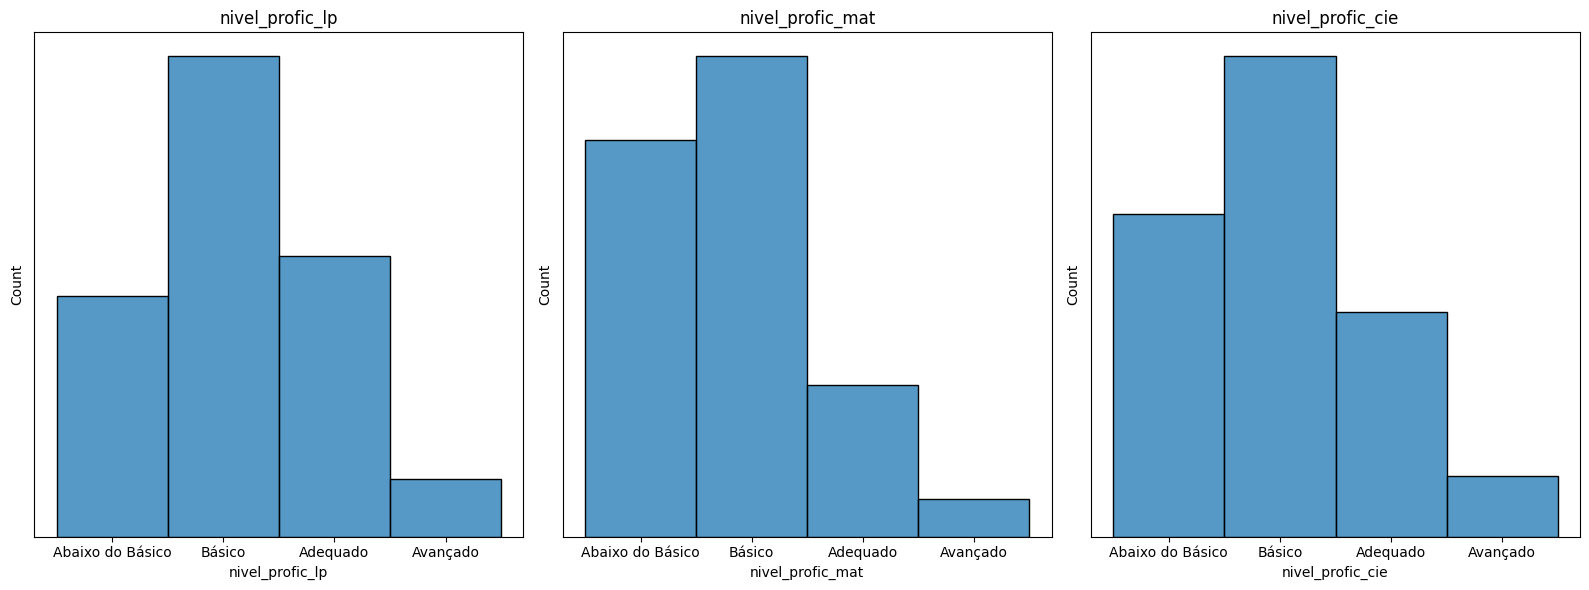

In [18]:
nivel_profic_hist_plots = multiple_cat_plot(df,1,3,['nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie'],0.8)

Analyzing the distribution of the data in the target variables related to the level of proficiency, we noticed that we are working with unbalanced classes in the classification task(Logistic Regression). As it is possible to check in the next cell, in subejcts, wehave more examples os class 'Basico' and less examples of class 'Avançado'. We can see that this analysis  corroborates with the distribution present in the graph

In [19]:
columns_name = ['nivel_profic_lp','nivel_profic_mat','nivel_profic_cie']

for column_name in columns_name:
    print(df[column_name].value_counts(normalize=True))

Básico              0.453456
Adequado            0.264876
Abaixo do Básico    0.227255
Avançado            0.054413
Name: nivel_profic_lp, dtype: float64
Básico              0.450214
Abaixo do Básico    0.372243
Adequado            0.142061
Avançado            0.035482
Name: nivel_profic_mat, dtype: float64
Básico              0.441399
Abaixo do Básico    0.296511
Adequado            0.206657
Avançado            0.055433
Name: nivel_profic_cie, dtype: float64


Then, we evaluated the histogram distribuction of the Percentage of correct answers in Portuguese, Mathematics and Natural Sciences Test.With the plots it is possible to conclude that the students perfomed better on Portuguese test, with the percentage in almost 62.5 %. The math test was the test where the students performed worse, with a hit percentage around 50.0 %. In Natural Sciences tests the students had hit percentage around 58.3 %. Comparing the distribution of histograms, it is possible to verify that in the math test that is a greater occurence of lower scores than the other tests. So, the datas of percentage of correct answers corroborate with the level of proficiency data.

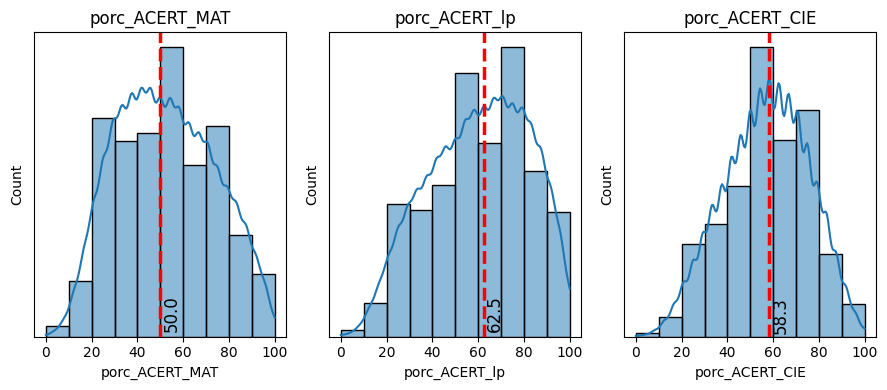

In [20]:
por_acert_hist_plots = multiple_hist_plots(1,3,['porc_ACERT_MAT','porc_ACERT_lp','porc_ACERT_CIE'],10,1,700)

With the .describe method of the columns related to the percentage of hits in Math, Portuguese and Sciences, it is possible to note that there is no outliers in the notes. Math Subject was the subject where more students have lower grades, 50% of the students have grades with values up to 50.00 , in contrast, in Portuguese Subject, 50% of the students reached grades until 62.50. 

In [21]:
df[['porc_ACERT_MAT','porc_ACERT_lp','porc_ACERT_CIE']].describe()

,porc_ACERT_MAT,porc_ACERT_lp,porc_ACERT_CIE
count,120596.000000,120596.000000,120596.000000
mean,52.225829,60.151213,56.928877
std,21.262466,21.730825,18.441383
min,0.000000,0.000000,0.000000
25%,37.500000,41.700000,45.800000
50%,50.000000,62.500000,58.300000
75%,66.700000,79.200000,70.800000
max,100.000000,100.000000,100.000000


With a correlation matrix it is possible to note how the features related with the proeficiency level of one subject have strong correlation with the proeficiency leval of another subject. In this first moment, the correlation matrix is making correlations only with variables with the same structure, in this case only categorical variables are being compared.

<AxesSubplot:>

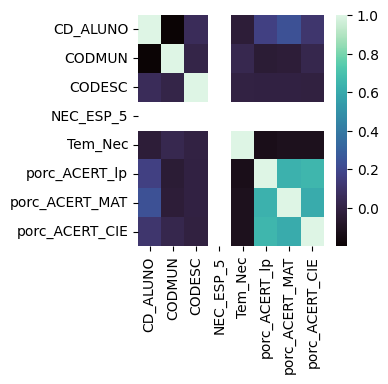

In [22]:
df_corr = df.corr()
fig, axes = plt.subplots(figsize=(3,3))
sns.heatmap(df_corr, cmap='mako')

## Data Preparation:

In order to create a preprocess pipeline valid for both problems (classification and regression), some function were created. In this pipeline, categorical variables are trasnformed into numerical variables by one hot encoding process. The functions are described in the cells below. 


In [23]:
def categorical_into_numeric(X, le=None):
    if not le:
        le = {}
        
    columns_names = X.columns.to_list()
    column_object_names = []
    for column_name in columns_names:
        if X[str(column_name)].dtype == object or column_name == "CODESC":
            if column_name not in le.keys():
                le[column_name] =  OneHotEncoder()
                transformed = le[column_name].fit_transform(X[column_name].values[:, None]).toarray()
            else:
                transformed = le[column_name].transform(X[column_name].values[:, None]).toarray()
            for cat in range(transformed.shape[1]):
                X[f"{str(column_name)}_{cat}"] = transformed[:, cat]
            X = X.drop(columns=column_name)
            
    return X, le

def feature_target_split(X,df,column_name):
    
    X_column = X.copy()
    y_column = df[[column_name]].values
    
    
    return X_column, y_column

def data_transform(df, columns_names, le=None):
        
    X = df.drop([columns_names[0], columns_names[1], columns_names[2]], axis=1)
    numeric_X, le = categorical_into_numeric(X, le)
    X_lp, y_lp = feature_target_split(numeric_X,df, columns_names[0])
    X_math, y_math = feature_target_split(numeric_X,df, columns_names[1])
    X_cie, y_cie = feature_target_split(numeric_X,df, columns_names[2])
                                         
    return X_lp, y_lp, X_math, y_math, X_cie, y_cie, le 


The first step was to drop the common columns for both problems and then replace the categorical targets for numerical ones. Posteriorly, the targets of the regression taks were dropped.

In [24]:
#dropping common columns for both problems (lienar and logistic regression)
df = df.drop(columns=['CD_ALUNO', 'CODESC', 'CODMUN', 'DT_NASCIMENTO', 'NOMESC','MUN','DE',
                      'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5'])

df = df.replace({'Básico':0, 'Adequado':1,'Abaixo do Básico':2,'Avançado':3})

#dropping columns for linear regression method
df_linear = df.drop(columns=['nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie'])

Then, the data was submitted to the transformation pipeline, transforming categorical into numeric variables

In [25]:
X_lp, y_lp, X_math, y_math, X_cie, y_cie,le = data_transform(df_linear,['porc_ACERT_MAT', 'porc_ACERT_lp','porc_ACERT_CIE'])

### Train Validation Split:

In order to validate our training step, we devided the data into train and validation sets with 80 and 20% of the data respectivily. For this, we used the train_test_split function from sklearn and we set a random_state in with the objective to ensure reproducibility.

In [26]:
#Portuguese:
x_train_lp, x_val_lp, y_train_lp, y_val_lp = train_test_split(X_lp, y_lp, test_size=0.20, random_state=SEED)

#Math
x_train_math, x_val_math, y_train_math, y_val_math = train_test_split(X_math, y_math, test_size=0.20, random_state=SEED)

#Sciences:
x_train_cie, x_val_cie, y_train_cie, y_val_cie = train_test_split(X_cie, y_cie, test_size=0.20, random_state=SEED)

The data were trained and evaluated both by the regression model created by the duo and by the moedls avaiable in the ckit-learn library

In [27]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.


class MyLinearRegression:
    def __init__(self, n_features):
        self.n_thetas = n_features + 1
        self.theta_0 = np.random.uniform(low=-1, high=1, size=1)
        self.thetas = np.asmatrix(np.random.uniform(low=-1, high=1, size=n_features)).T

        self.train_cost = []
        self.valid_cost = []
        
        
    def h_theta(self, x):
        return self.theta_0 + x*self.thetas
    
    
    def gradient(self, X, y):
        X = np.asmatrix(X.values)
        y = np.asmatrix(y)
        m = len(y)
        ht = self.h_theta(X)
        grad_theta_0 = 1/m * (ht - y).sum()
        grad_thetas = np.zeros(len(self.thetas)) 
        for i in range(len(grad_thetas)):
            grad_thetas[i] = 1/m * (ht - y).T*X[:,i]
        return grad_theta_0, grad_thetas


    def theta_update(self, grad_theta_0, grad_thetas, learning_rate):
        self.theta_0 = self.theta_0 - learning_rate*grad_theta_0
        self.thetas = self.thetas - learning_rate*(np.asmatrix(grad_thetas).T)


    def cost(self, X, y):
        X = np.asmatrix(np.array(X))
        y = np.asmatrix(np.array(y))
        m = len(y) 
        ht = self.h_theta(X)        
        return float( 1/(2*m) * (ht - y).T * (ht - y) )


    def fit(self, X, y, learning_rate, n_epochs, size_batches, validX, validy, verbose=False):
        for epoch in range(n_epochs + 1):
            n_batches = int( len(X) / size_batches )
            for en, (batchX, batchy) in enumerate( zip(np.array_split(X, n_batches), np.array_split(y, n_batches)) ):                
                grad_theta_0, grad_thetas = self.gradient(batchX, batchy)
                self.theta_update(grad_theta_0, grad_thetas, learning_rate=learning_rate)                  
             
            if verbose and (epoch%10 == 0):
                print('Epoch: {:04d} | Num. batches: {} | Cost function: {}'.format(epoch, n_batches, int( self.cost(X, y))))
                
            self.train_cost.append( self.cost(batchX, batchy ) )
            self.valid_cost.append( self.cost(validX, validy ) )    


Epoch: 0000 | Num. batches: 9 | Cost function: 1041
Epoch: 0010 | Num. batches: 9 | Cost function: 223
Epoch: 0020 | Num. batches: 9 | Cost function: 215
Epoch: 0030 | Num. batches: 9 | Cost function: 209
Epoch: 0040 | Num. batches: 9 | Cost function: 205
Epoch: 0050 | Num. batches: 9 | Cost function: 200
Epoch: 0060 | Num. batches: 9 | Cost function: 197
Epoch: 0070 | Num. batches: 9 | Cost function: 193
Epoch: 0080 | Num. batches: 9 | Cost function: 190
Epoch: 0090 | Num. batches: 9 | Cost function: 187
Epoch: 0100 | Num. batches: 9 | Cost function: 185


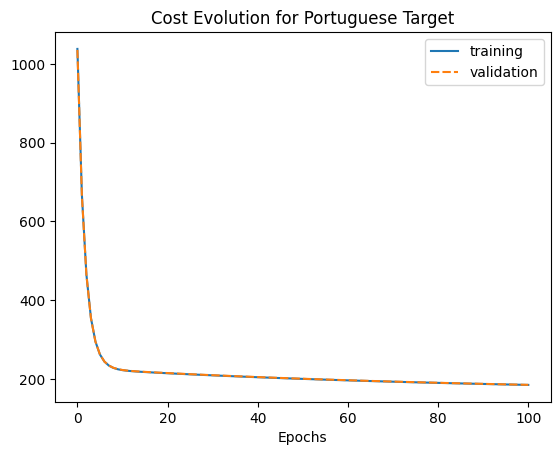

In [28]:
# Portuguese
mlr = MyLinearRegression(n_features=X_lp.shape[1])
mlr.fit(x_train_lp, y_train_lp, learning_rate=0.001, n_epochs=100, size_batches=10240, validX=x_val_lp, validy=y_val_lp, verbose=True)

ax = sns.lineplot(pd.DataFrame.from_dict( {'training' : mlr.train_cost, 'validation' : mlr.valid_cost} ))
ax.set_title('Cost Evolution for Portuguese Target')
ax.set_xlabel('Epochs')
plt.show()

Epoch: 0000 | Num. batches: 9 | Cost function: 12763918783298
Epoch: 0010 | Num. batches: 9 | Cost function: 2157717164039
Epoch: 0020 | Num. batches: 9 | Cost function: 2079866739511
Epoch: 0030 | Num. batches: 9 | Cost function: 2033631692952
Epoch: 0040 | Num. batches: 9 | Cost function: 1993854003921
Epoch: 0050 | Num. batches: 9 | Cost function: 1959324625665
Epoch: 0060 | Num. batches: 9 | Cost function: 1929136247409
Epoch: 0070 | Num. batches: 9 | Cost function: 1902568303185
Epoch: 0080 | Num. batches: 9 | Cost function: 1879043260777
Epoch: 0090 | Num. batches: 9 | Cost function: 1858094318006
Epoch: 0100 | Num. batches: 9 | Cost function: 1839341172665


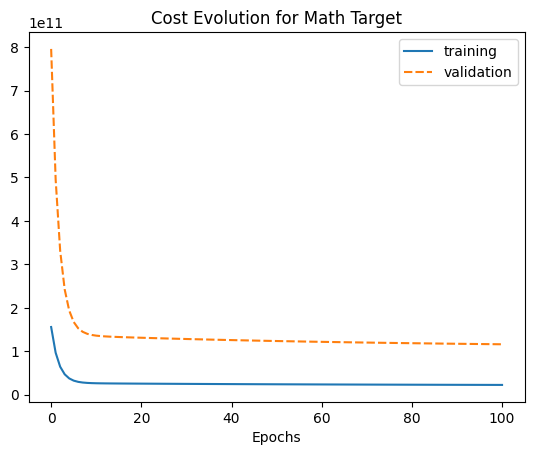

In [27]:
# Math
mlr = MyLinearRegression(n_features=X_lp.shape[1])
mlr.fit(x_train_math, y_train_math, learning_rate=0.001, n_epochs=100, size_batches=10240, validX=x_val_math, validy=y_val_math, verbose=True)

ax = sns.lineplot(pd.DataFrame.from_dict( {'training' : mlr.train_cost, 'validation' : mlr.valid_cost} ))
ax.set_title('Cost Evolution for Math Target')
ax.set_xlabel('Epochs')
plt.show()

Epoch: 0000 | Num. batches: 9 | Cost function: 8731354066526
Epoch: 0010 | Num. batches: 9 | Cost function: 1559467447188
Epoch: 0020 | Num. batches: 9 | Cost function: 1493242381130
Epoch: 0030 | Num. batches: 9 | Cost function: 1453056220535
Epoch: 0040 | Num. batches: 9 | Cost function: 1420452567732
Epoch: 0050 | Num. batches: 9 | Cost function: 1393510631070
Epoch: 0060 | Num. batches: 9 | Cost function: 1370880554189
Epoch: 0070 | Num. batches: 9 | Cost function: 1351589256414
Epoch: 0080 | Num. batches: 9 | Cost function: 1334927512786
Epoch: 0090 | Num. batches: 9 | Cost function: 1320371941981
Epoch: 0100 | Num. batches: 9 | Cost function: 1307531007934


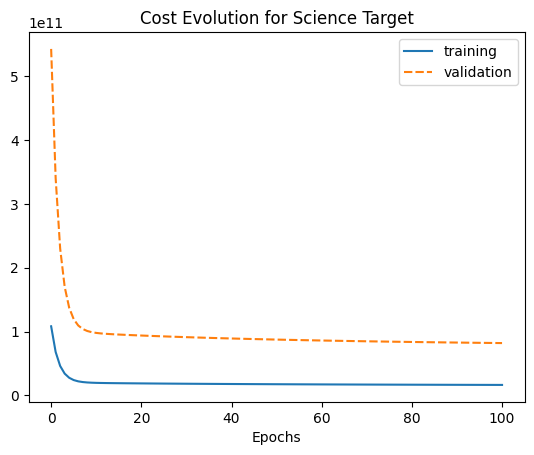

In [28]:
# Science
mlr = MyLinearRegression(n_features=X_lp.shape[1])
mlr.fit(x_train_cie, y_train_cie, learning_rate=0.001, n_epochs=100, size_batches=10240, validX=x_val_cie, validy=y_val_cie, verbose=True)

ax = sns.lineplot(pd.DataFrame.from_dict( {'training' : mlr.train_cost, 'validation' : mlr.valid_cost} ))
ax.set_title('Cost Evolution for Science Target')
ax.set_xlabel('Epochs')
plt.show()

In [29]:
# TODO: Linear Regression. You can use scikit-learn libraries.

In [41]:
def model_train_and_evaluation(x_train, y_train, x_val, y_val, learning_rate):
    
    #Creating an object of the model
    model = SGDRegressor(max_iter=2000,random_state=SEED, learning_rate='invscaling', eta0=learning_rate)
    #Fitting the model with the trainning data
    model.fit(x_train, y_train)
    
    print(f'Model intercept value : {model.intercept_}')
#     print(f' Coeficients : {model.coef_}')
    
    y_pred = model.predict(x_val)
    
    print('\n')
    
    print(f"Mean Absolut error: {mean_absolute_error(y_val, y_pred)}")
    print(f"R2 Score: {r2_score(y_val, y_pred)}")
    return model

In [31]:
model_math = model_train_and_evaluation(x_train_math, y_train_math.squeeze(1),x_val_math, y_val_math.squeeze(1), 0.001)

Model intercept value : [1.86401826]


Mean Absolut error: 14.859438544480298
R2 Score: 0.2925771462028943


In [32]:
model_lp = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.001)

Model intercept value : [1.73023925]


Mean Absolut error: 13.927666024327104
R2 Score: 0.34827246187936445


In [33]:
model_cie = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.001)

Model intercept value : [1.88922188]


Mean Absolut error: 12.561150393082555
R2 Score: 0.28208216349103354



> What are the conclusions? (1-2 paragraphs)




2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [34]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.

### Normal:

In [29]:
def model_normal_solution(x_train, y_train, x_val, y_val):
    
    x_train_arr = np.array(x_train)
    y_train_arr = np.array(y_train)
    
    thetas
    
    x_val_arr = np.array(x_val)
    y_val_arr = np.array(y_val)
    
    print(f'Model intercept value : {model.intercept_}')
#     print(f' Coeficients : {model.coef_}')
    
    y_pred = model.predict(x_val)
    
    print('\n')
    
    print(f"Mean squared error: {mean_absolute_error(y_val, y_pred)}")
    print(f"R2 Score: {r2_score(y_val, y_pred)}")


In [105]:
x_train_lp_mat = np.asmatrix(x_train_lp)
y_train_lp_mat = np.asmatrix(y_train_lp)

thetas = np.linalg.inv( x_train_lp_mat.T * x_train_lp_mat ) * ( x_train_lp_mat.T * y_train_lp_mat ) 

x_val_lp_mat = np.asmatrix(x_val_lp)
y_val_lp_mat = np.asmatrix(y_val_lp)

y_pred = x_val_lp_mat * thetas

print(f"Mean squared error: {mean_absolute_error(y_val_lp_mat, y_pred)}")
print(f"R2 Score: {r2_score(y_val_lp_mat, y_pred)}")

Mean squared error: 29216.028843283584
R2 Score: -3339265.6447629295


In [111]:
def get_best_param(X, y):  
    X_transpose = X.T  
    best_params = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)  
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
      
    return best_params # returns a list  
thetas = get_best_param(x_train_lp, y_train_lp)
y_pred = x_val_lp_mat * thetas
print(f"Mean squared error: {mean_absolute_error(y_val_lp_mat, y_pred)}")
print(f"R2 Score: {r2_score(y_val_lp_mat, y_pred)}")

Mean squared error: 31219.527502739464
R2 Score: -3683469.3556714016


In [30]:
model_normal_lp = model_normal_solution(x_train_lp, y_train_lp,x_val_lp, y_val_lp)

Model intercept value : [5.05059441e+13]


Mean squared error: 13.932074717558043
R2 Score: 0.3481847202569769


math:

In [37]:
model_normal_math = model_normal_solution(x_train_math, y_train_math,x_val_math, y_val_math)

Model intercept value : [-1.00166076e+13]


Mean squared error: 14.867125035629146
R2 Score: 0.292298605439851


In [38]:
model_normal_cie = model_normal_solution(x_train_cie, y_train_cie,x_val_cie, y_val_cie)

Model intercept value : [-1.5939753e+13]


Mean squared error: 12.55891292236733
R2 Score: 0.28227801338683733


#### Portuguese:

In [39]:
model_lp_0_0001 = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.0001)

Model intercept value : [1.6916661]


Mean Absolut error: 13.938457598699856
R2 Score: 0.3479843140837523


In [40]:
model_lp_0_1 = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.1)

Model intercept value : [4.82670682]


Mean Absolut error: 14.253166548543648
R2 Score: 0.31724685498410843


In [41]:
model_lp_0_005 = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.005)

Model intercept value : [1.91442866]


Mean Absolut error: 13.9448599839708
R2 Score: 0.3474517865108596


#### Math

In [42]:
model_math_0_0001 = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.0001)

Model intercept value : [1.79948711]


Mean Absolut error: 14.893939001511681
R2 Score: 0.2909787678373774


In [43]:
model_math_0_1 = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.1)

Model intercept value : [6.26086562]


Mean Absolut error: 16.398440821418262
R2 Score: 0.15675049812673103


In [44]:
model_math_0_005 = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.005)

Model intercept value : [2.05645625]


Mean Absolut error: 14.897130714795576
R2 Score: 0.2920719737227845


#### Sciences:

In [45]:
model_cie_0_0001 = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.0001)

Model intercept value : [1.8569237]


Mean Absolut error: 12.57049678224066
R2 Score: 0.2814839636931441


In [46]:
model_cie_0_1 = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.1) 

Model intercept value : [6.2750283]


Mean Absolut error: 13.360476477019276
R2 Score: 0.17253078988060988


In [47]:
model_cie_0_0005 = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.0005)

Model intercept value : [1.86354099]


Mean Absolut error: 12.566625645505786
R2 Score: 0.2821225530949837



3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [37]:
# # TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures

In [49]:
#
# Because of the number of features that is more than 300, it was necessary to perform a selection of a subset of features in order 
# to computational enable the application of the PolynomialFeatures strategy. The most important features considered  are listed bellow 
# were their importance was assigned with the analysis of the questions and thier correlation the the target variables
###

columns = x_train_lp.columns
filter = ['Q1', 'Q9', 'Q10', 'Q12', 'Q14', 'Q18','Q22', 'Q23', 'Q24', 'Q25', 'Q33', 'Q57', 'Regiao', 'DE', 'Serie']
selection = []
for col in columns:
    for fil in filter:
        if fil in col:
            selection.append(col)

In [50]:
#
# Dataset with the subset of features
###

# Portuguese
x_train_lp_slim, x_val_lp_slim, y_train_lp_slim, y_val_lp_slim = x_train_lp[selection], x_val_lp[selection], y_train_lp, y_val_lp

# Math
x_train_math_slim, x_val_math_slim, y_train_math_slim, y_val_math_slim = x_train_math[selection], x_val_math[selection], y_train_math, y_val_math 

# Science
x_train_cie_slim, x_val_cie_slim, y_train_cie_slim, y_val_cie_slim = x_train_cie[selection], x_val_cie[selection], y_train_cie, y_val_cie

In [52]:
#
# Even though we are working a subset of features from the dataset, after applying the PolynomialFeature this number easy can increase at an amount that
# regular computers are not able to cope with the amounts of memory necessary. Because of that, we decided to use just polynomial features of second order,
# that is, all the features are, at most, combined in a second order fashion way
###

#
# Portuguese target features
###
model_lp_slim_poly = model_train_and_evaluation(PolynomialFeatures(2).fit_transform(x_train_lp_slim), y_train_lp_slim, PolynomialFeatures(2).fit_transform(x_val_lp_slim), y_val_lp_slim, 0.001)

Model intercept value : [0.87613861]


Mean Absolut error: 15.697654771979531
R2 Score: 0.19057306397480178


In [53]:
#
# Math target feature
###
model_math_slim_poly = model_train_and_evaluation(PolynomialFeatures(2).fit_transform(x_train_math_slim), y_train_math_slim, PolynomialFeatures(2).fit_transform(x_val_math_slim), y_val_math_slim, 0.001)

Model intercept value : [0.94686336]


Mean Absolut error: 16.535391132700816
R2 Score: 0.154667308280243


In [54]:
#
# Science target feature
###

model_cie_slim_poly = model_train_and_evaluation(PolynomialFeatures(2).fit_transform(x_train_cie_slim), y_train_cie_slim, PolynomialFeatures(2).fit_transform(x_val_cie_slim), y_val_cie_slim, 0.001)

Model intercept value : [1.01189972]


Mean Absolut error: 14.016724552820818
R2 Score: 0.12550428916488354


*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


With the analysis was possible to see the role of the learning rate in the modeling step. In all the cases, with lar tge learning_rate values (0.1), the model result was worst, but when the values were smaller, the model had its results improved. When model methodologies are compared (linear x polynomial logistic regression) it is possible to note that the data modeling and pre-processing may vary due to the particularities of the model. 

In the case of the polynomial regression, some features had to be removed from the analysis because of hardware memory issues. When the linear regression model was evaluated without the features that were removed in polynomial regression model, there was a worsening in the performance of the linear regression model. It is also relevant to point out the importance of the role of exploratory data analysis to understand which features could be removed in the polynomial features selection.

4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [51]:
# TODO: Plot the cost function vs. number of iterations in the training set.

*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

Realizing model inference:


In [52]:
data_path = "assets/SARESP_test.csv"
df_test=pd.read_csv(data_path)

In [53]:
#dropping common columns for both problems (lienar and logistic regression)

df_test = df_test.drop(columns=['CD_ALUNO', 'CODESC', 'CODMUN', 'DT_NASCIMENTO', 'NOMESC','MUN','DE',
                      'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5'])


df_test = df_test.replace({'Básico':0, 'Adequado':1,'Abaixo do Básico':2,'Avançado':3})

#dropping columns for linear regression method
df_test = df_test.drop(columns=['nivel_profic_mat','nivel_profic_cie'])

In [54]:
X_lp_test, y_lp_test, X_math_test, y_math_test, X_cie_test, y_cie_test,_ = data_transform(df_test,['porc_ACERT_MAT', 'porc_ACERT_lp','porc_ACERT_CIE'],le)

In [55]:
def model_inference(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    print(y_test.shape, y_pred.shape, x_test.shape)
    
    print(f"Mean Absolut error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")


In [56]:
#Math Inference:
y_pred_math_test = model_inference(model_math, X_math_test, y_math_test)


(1000, 1) (1000,) (1000, 324)
Mean Absolut error: 15.614610166459194
R2 Score: 0.2753487794336912


In [57]:
#Math Inference:
y_pred_lp_test = model_inference(model_lp, X_lp_test, y_lp_test)

(1000, 1) (1000,) (1000, 324)
Mean Absolut error: 14.456530675736529
R2 Score: 0.33103639400538754


In [58]:
#Math Inference:
y_pred_cie_test = model_inference(model_cie, X_cie_test, y_cie_test)

(1000, 1) (1000,) (1000, 324)
Mean Absolut error: 12.558216111349655
R2 Score: 0.3005765056821229


## Logistic Regression

Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [59]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.

In order to perform Logistic regression, a new dataframe was created with the relevant variables to the modeling. Then, this dataframe was been submited to the categorical to numerical transform pipeline

In [60]:
df_logistic = df.drop(columns=['porc_ACERT_lp','porc_ACERT_MAT', 'porc_ACERT_CIE'])

In [62]:
X_lp_log, y_lp_log, X_math_log, y_math_log, X_cie_log, y_cie_log,le_ = data_transform(df_logistic,['nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie'])

In [63]:
#Portuguese:
x_train_lp_log, x_val_lp_log, y_train_lp_log, y_val_lp_log = train_test_split(X_lp_log, y_lp_log, test_size=0.20, random_state=SEED)

#Math
x_train_math_log, x_val_math_log, y_train_math_log, y_val_math_log = train_test_split(X_math_log, y_math_log, test_size=0.20, random_state=SEED)

#Sciences:
x_train_cie_log, x_val_cie_log, y_train_cie_log, y_val_cie_log = train_test_split(X_cie_log, y_cie_log, test_size=0.20, random_state=SEED)

In [64]:
def model_train_and_evaluation_logistic(x_train, y_train, x_val, y_val, ticklabels=['Básico','Adequado','Abaixo do Básico','Avançado']):
    
    model_logistic = LogisticRegression(random_state=SEED, penalty='l2')
    model_logistic.fit(x_train, y_train)
    y_pred = model_logistic.predict(x_val)
    
    confusion = confusion_matrix(y_val, y_pred, normalize='true')
    accuracy = balanced_accuracy_score(y_val, y_pred)
    
    sns.heatmap(confusion, annot=True, linewidths=.5,cmap="mako",
                xticklabels=ticklabels, yticklabels=ticklabels)
    
    print(f"Balanced Accuracy Score: {accuracy}")
    print('\n')
    
   

Balanced Accuracy Score: 0.408779206942183




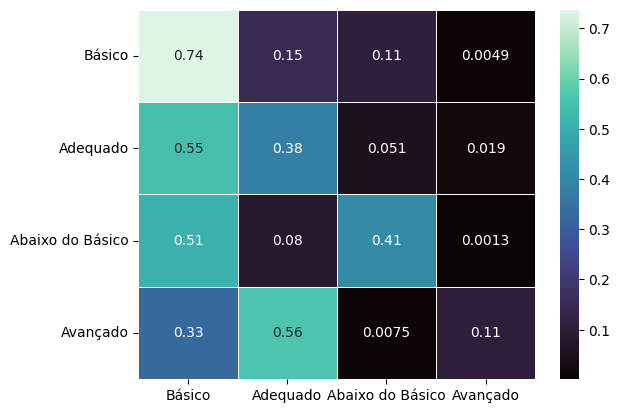

In [65]:
model_logistic_pt = model_train_and_evaluation_logistic(x_train_lp_log, y_train_lp_log, x_val_lp_log, y_val_lp_log)

Balanced Accuracy Score: 0.4022437073282328




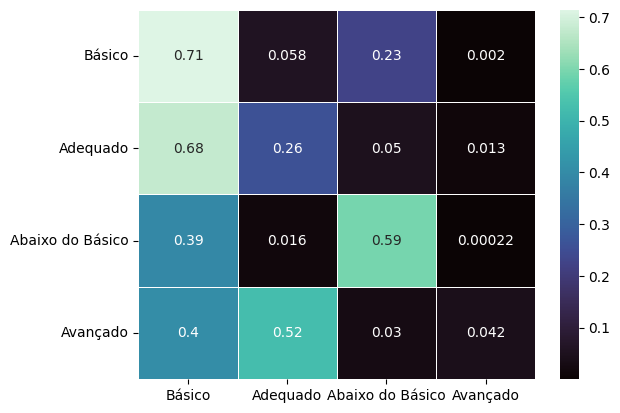

In [66]:
model_logistic_pt = model_train_and_evaluation_logistic(x_train_math_log, y_train_math_log, x_val_math_log, y_val_math_log)

Balanced Accuracy Score: 0.3925200294005125




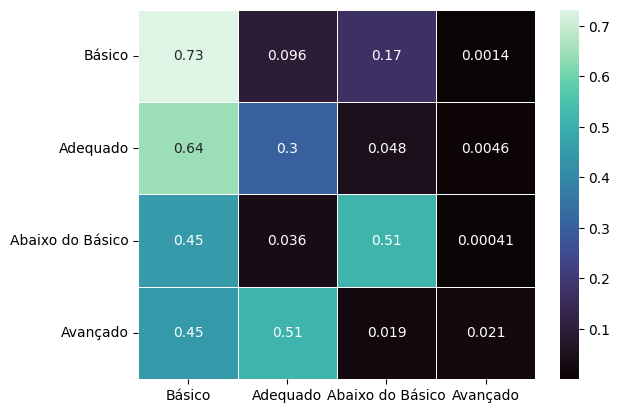

In [67]:
model_logistic_pt = model_train_and_evaluation_logistic(x_train_cie_log, y_train_cie_log, x_val_cie_log, y_val_cie_log)

> What are the conclusions? (1-2 paragraphs)


2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)


3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)


## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**